## Correlation $\langle z_i F_J \rangle$

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [15]:
ls=[16,24]
h_max=2.7
zf={}
f={}
z={}
for l in ls:
    data=np.load(f'data/input_output_map/input_output_1nn_{l}_l_{h_max}_h_100_n.npz')
    zf[l]=data['correlation']
    f[l]=data['density_F']
    z[l]=data['density']

#### Study the Quantum Covariance

In [16]:

g={}
for l in ls:

    cov=zf[l]-f[l][:,None,:]*z[l][:,:,None]

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l):
        c[:,i,:]=cov[:,idx,(idx+i)%l]

    g[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    

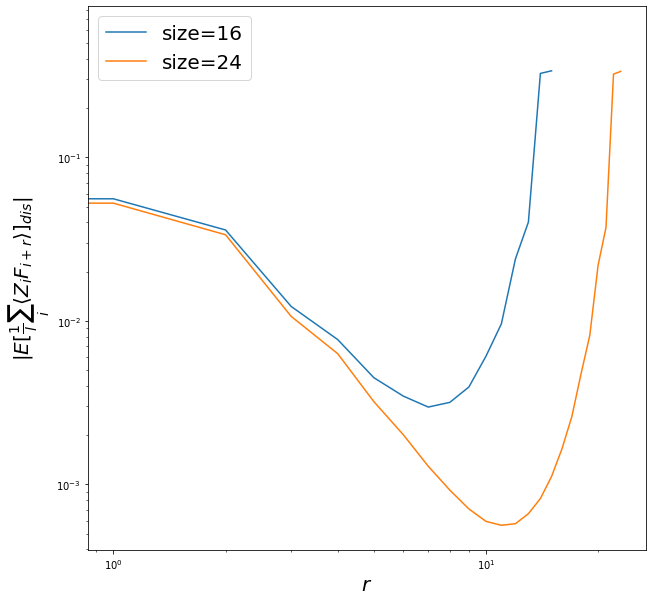

In [18]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.abs(np.average(g[l],axis=0)),label=f'size={l}')
    
plt.ylabel(r'$|E[\frac{1}{l}\sum_i \langle Z_i F_{i+r} \rangle]_{dis}|$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.loglog()
plt.show()


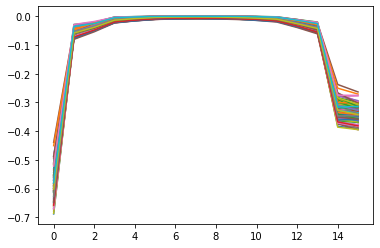

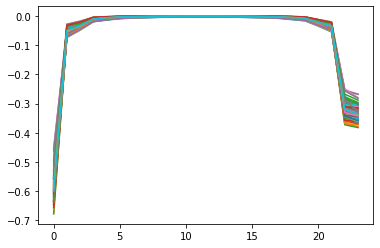

In [33]:
for i in range(100):
    plt.plot(g[16][i])
plt.show()

for i in range(100):
    plt.plot(g[24][i])
plt.show()